In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold



%matplotlib inline

In [2]:
train = pd.read_csv("internship_train.csv")
test = pd.read_csv("internship_hidden_test.csv")

In [3]:
df = train.copy()
test_df = test.copy()

In [4]:
df.astype({              '0': 'float64', 
                         '1': 'float64', 
                         '2': 'float64',
                         '3': 'float64',
                         '4': 'float64', 
                         '5': 'float64', 
                         '8': 'float64',
                         '9': 'float64', 
                         '10': 'float64', 
                         '11': 'float64',
                         '12': 'float64'}).dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
5         float64
6         float64
7         float64
8         float64
9         float64
10        float64
11        float64
12        float64
13        float64
14        float64
15        float64
16        float64
17        float64
18        float64
19        float64
20        float64
21        float64
22        float64
23        float64
24        float64
25        float64
26        float64
27        float64
28        float64
29        float64
30        float64
31        float64
32        float64
33        float64
34        float64
35        float64
36        float64
37        float64
38        float64
39        float64
40        float64
41        float64
42        float64
43        float64
44        float64
45        float64
46        float64
47        float64
48        float64
49        float64
50        float64
51        float64
52        float64
target    float64
dtype: object

In [4]:
# стандартизация:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(df)
transformer
Normalizer()

normalizer_df = transformer.transform(df)
norm_df = pd.DataFrame(normalizer_df)

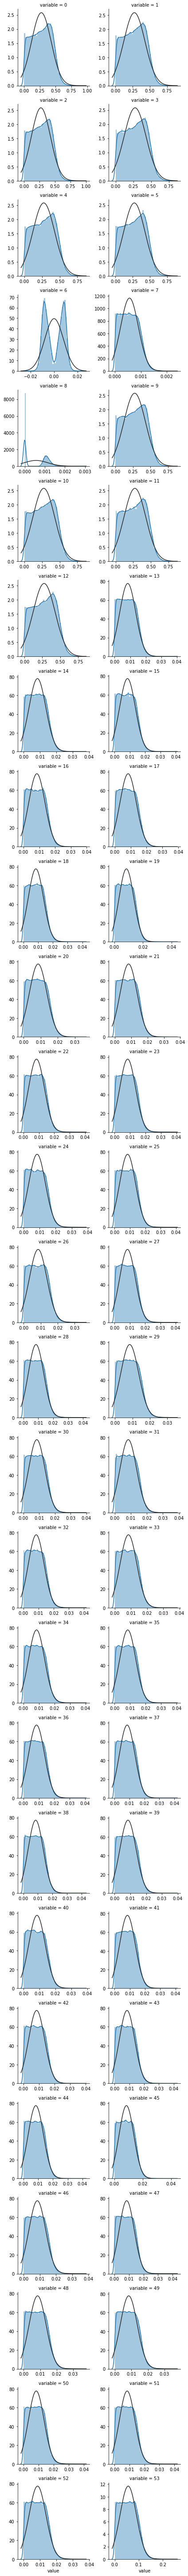

In [5]:
values = list(norm_df.columns) #list of columns

# standart distribution distplots
f = pd.melt(norm_df, value_vars=values)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value", fit=st.norm)

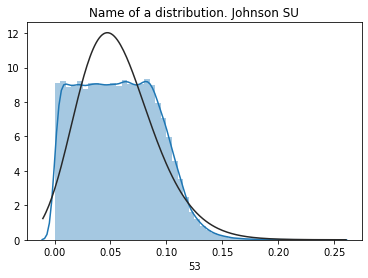

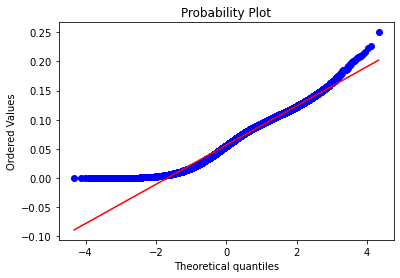

In [6]:
ploot = norm_df[53]
plt.figure(1); plt.title('Name of a distribution. Johnson SU')
sns.distplot(ploot, kde=True, fit=st.johnsonsu)
fig = plt.figure()
res = st.probplot(ploot, plot=plt)

In [7]:
from sklearn.preprocessing import StandardScaler
transformer_2 = StandardScaler()


standart_df = transformer_2.fit_transform(df)
std_df = pd.DataFrame(standart_df)

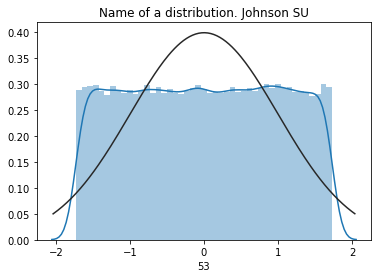

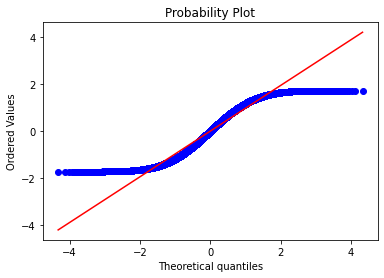

In [10]:
plo = std_df[53]
plt.figure(1); plt.title('Name of a distribution. Johnson SU')
sns.distplot(plo, kde=True, fit=st.johnsonsu)
fig = plt.figure()
res = st.probplot(plo, plot=plt)

In [ ]:
#  после стандартизации диапазон величин target (plo) смещается в [-1.731363e+00; 1.729085e+00].
# из-за этого логарифм отрицательных значений равен NaN(0), что недопустимо.

In [18]:
target_std = transformer_2.fit_transform(df[['target']])
tg = pd.DataFrame(target_std)
tg

,0
0,-1.035624
1,0.405914
2,0.851892
3,0.671025
4,0.579066
...,...
89995,-0.881407
89996,-1.251763
89997,-0.394513
89998,-1.257797


In [20]:
tg = np.log(tg) 

<ipython-input-20-3bfa84ac0f9b>:1: RuntimeWarning: invalid value encountered in log
  tg = np.log(tg)


In [29]:
tg

,0
0,NaN
1,-0.901614
2,-0.160296
3,-0.398949
4,-0.546339
...,...
89995,NaN
89996,NaN
89997,NaN
89998,NaN


In [59]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    data_type = df.dtypes.sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    return pd.concat([total, percent, data_type], axis=1, keys=['Total','Percent','Type'])

In [60]:
missing_percentage(tg)

,Total,Percent,Type
0,45004,50.0,float64


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 90000 and the array at index 1 has size 1

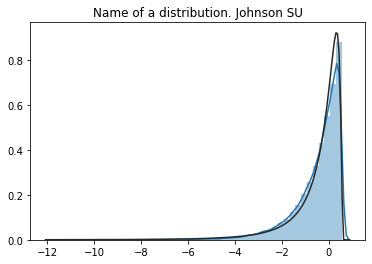

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(3); plt.title('Name of a distribution. Johnson SU')
sns.distplot(tg, kde=True, fit=st.johnsonsu)
fig = plt.figure()
res = st.probplot(tg, plot=plt)

In [94]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()

mmx = minmaxscaler.fit_transform(df)

minmax_sc = pd.DataFrame(mmx)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 90000 and the array at index 1 has size 54

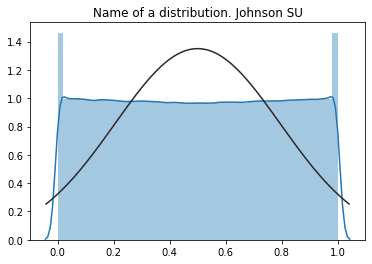

<Figure size 432x288 with 0 Axes>

In [95]:
plt.figure(4); plt.title('Name of a distribution. Johnson SU')
sns.distplot(mmx, kde=True, fit=st.norm)
fig = plt.figure()
res = st.probplot(mmx, plot=plt)

In [ ]:
# заменим нули на NaN

In [96]:
cols = list(minmax_sc.columns[:-1])
target = list(minmax_sc.columns[[53]])

In [97]:
minmax_sc[cols] = minmax_sc[cols].replace({0:np.nan})

In [98]:
missing_percentage(minmax_sc)

,Total,Percent,Type
0,200,0.22,float64
1,184,0.20,float64
2,169,0.19,float64
3,190,0.21,float64
4,192,0.21,float64
5,185,0.21,float64
6,453,0.50,float64
7,1,NaN,float64
8,45073,50.08,float64
9,176,0.20,float64


In [111]:
minmax_sc = minmax_sc.fillna(minmax_sc.median())

In [112]:
missing_percentage(minmax_sc)

,Total,Percent,Type


In [113]:
minmax_sc[cols] = minmax_sc[cols].replace({1.0:np.nan})

In [114]:
missing_percentage(minmax_sc)

,Total,Percent,Type
6,504,0.56,float64
7,1,NaN,float64
8,90000,100.00,float64
13,1,NaN,float64
14,1,NaN,float64
16,1,NaN,float64
17,1,NaN,float64
21,1,NaN,float64
23,1,NaN,float64
26,1,NaN,float64


In [115]:
minmax_sc = minmax_sc.fillna(minmax_sc.median())

In [116]:
missing_percentage(minmax_sc)

,Total,Percent,Type
8,90000,100.0,float64


In [117]:
minmax_sc = minmax_sc.drop(8, axis=1)

In [123]:
minmax_sc[target]

,53
0,0.201055
1,0.617630
2,0.746509
3,0.694242
4,0.667668
...,...
89995,0.245620
89996,0.138595
89997,0.386323
89998,0.136851


In [124]:
minmax_sc[target] = minmax_sc[target].replace({0:np.nan})
minmax_sc[target] = minmax_sc[target].fillna(minmax_sc[target].median())

In [125]:
missing_percentage(minmax_sc[target])

,Total,Percent,Type


In [126]:
minmax_sc[target] = minmax_sc[target].replace({1.0:np.nan})
minmax_sc[target] = minmax_sc[target].fillna(minmax_sc[target].median())
missing_percentage(minmax_sc[target])

,Total,Percent,Type


In [127]:
minmax_sc

,0,1,2,3,4,5,6,7,9,10,...,44,45,46,47,48,49,50,51,52,53
0,0.472946,0.977956,0.032064,0.442886,0.765531,0.194389,0.275267,0.107460,0.264529,0.563126,...,0.889397,0.058035,0.130856,0.497792,0.769854,0.588197,0.603093,0.526387,0.734054,0.201055
1,0.773547,0.412826,0.715431,0.464930,0.002004,0.396794,0.892480,0.763720,0.286573,0.218437,...,0.832331,0.477926,0.192356,0.827626,0.684031,0.672760,0.618057,0.211601,0.928138,0.617630
2,0.859719,0.098196,0.963928,0.222445,0.222445,0.292585,0.932283,0.651165,0.861723,0.977956,...,0.935357,0.026330,0.544047,0.839499,0.595834,0.151013,0.750381,0.853024,0.805407,0.746509
3,0.829659,0.701403,0.963928,0.741483,0.416834,0.316633,0.917424,0.424643,0.681363,0.222445,...,0.185972,0.427792,0.703330,0.763788,0.431196,0.167937,0.017208,0.621202,0.358873,0.694242
4,0.637275,0.719439,0.040080,0.436874,0.635271,0.603206,0.908248,0.767310,0.424850,0.282565,...,0.125770,0.128002,0.151208,0.009956,0.273712,0.694422,0.454410,0.572484,0.300827,0.667668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,0.657315,0.088176,0.641283,0.729459,0.014028,0.146293,0.746183,0.563879,0.631263,0.356713,...,0.017756,0.412404,0.514460,0.676333,0.114089,0.256648,0.826795,0.946409,0.158076,0.245620
89996,0.434870,0.945892,0.348697,0.655311,0.511022,0.779559,0.318814,0.861699,0.288577,0.807615,...,0.343139,0.280651,0.965535,0.091667,0.425740,0.673842,0.842528,0.438435,0.457552,0.138595
89997,0.378758,0.813627,0.426854,0.114228,0.989980,0.380762,0.809773,0.633707,0.442886,0.683367,...,0.993527,0.192440,0.578884,0.301496,0.103740,0.731416,0.519478,0.561528,0.202757,0.386323
89998,0.837675,0.957916,0.326653,0.070140,0.781563,0.154309,0.318814,0.687313,0.579158,0.821643,...,0.849541,0.168377,0.736687,0.439342,0.841483,0.706459,0.043162,0.583112,0.083106,0.136851


In [130]:
minmax_sc[target].describe()

,53
count,90000.000000
mean,0.500329
std,0.288972
min,0.000001
25%,0.250907
50%,0.500304
75%,0.750583
max,0.999984


In [ ]:
# пробуем модель после MinMax, убрав 8 и "выбросы"

In [131]:
X = minmax_sc.values[:,:-1] #train data from features
y = minmax_sc[target] #dependend variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [132]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [133]:
y_pred = model.predict(X_test)

In [137]:
metric = mean_squared_error(y_test, y_pred, squared=True)
print("MSE = ", metric)

MSE =  0.08390975530768958


In [136]:
metric = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE = ", metric)

RMSE =  0.2896718062008962
